In [ ]:
# import modules

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler # internet said it might be a good idea to do a standardized dataset instead of a normalized one
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

**Hypothesis formulation: Online Shopping Dataset and  Understanding the Dataset**

Before I make a hypothesis: I need to understand what each of the metrics are in the dataset and what they are asking for that aren't self explanatory like "month" or the weekend and revenue booleans or new vs returning visitor.

Administrative: # of pages related to administrative tasks. Duration is the number of seconds spent on administrative pages.

Informational: # of pages clicked on related to information like faqs, duration is in # of seconds

Product Related: # of pages related to the products themselves like a page about watches for examples, also has duration in # of seconds.

Bounce Rate: percentage of visitors that leave after clicking on the first site.

Exit rate: percentage of visitors that end their session

Page value: value of a page based on prior purchase.

Operating Systems, Browser, Region, Traffic Type: Encodings based on type of browser, operating system (windows or mac) and geographic location








**Hypothesis**
The ultimate goal is to find which variables lead to the revenue boolean being true. I think that a returning visitor is more likely to buy than a new visitor becuase they have a better idea of what they want to buy since they have already visited that website. I also think users with a low bounce rate and exit rate are more likely to generate value since if you leave a page the odds of buying anything at all are zero. I think it is unlikely for month to be a factor unless we are dealing with products that are seasonal like winter clothing for example. This is because online shopping itself should not be dependent on the seasons. Finally, I think a higher product related duration is more likely to lead to revenue because that means the shopper is spending more time looking at products and choosing something, which in turn should lead to more revenue.

In [ ]:
# Import the dataset
from google.colab import files
uploaded = files.upload()

Saving online_shoppers_intention.csv to online_shoppers_intention.csv


In [ ]:
# Explatory Data Analysis (EDA)

df = pd.read_csv('online_shoppers_intention.csv', index_col = 'Revenue')
#df.head()
#print(df.columns)
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


**Documentation**: DF describe gives me a good idea of where everything will come into place, like I can derive the average of how many seconds people spent on administrative, informatinoal, and product related duration. You can also see that most people did not go on a special holiday, meaning that likely won't be the biggest influence. It was also interesting to see the variety from browser, region, and traffic types.

In [ ]:
# divide duration by 60 to get minutes
# I interpret data better in minutes which is why I am doing this
columns_with_seconds = ["Administrative_Duration", "Informational_Duration", "ProductRelated_Duration"]
df[columns_with_seconds] = df[columns_with_seconds] / 60
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,1.346977,0.503569,0.574540,31.731468,19.912437,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,2.946318,1.270156,2.345822,44.475503,31.894488,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,3.068958,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,0.125000,0.000000,0.000000,18.000000,9.982282,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,1.554271,0.000000,0.000000,38.000000,24.402620,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,56.645833,24.000000,42.489583,705.000000,1066.225371,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


**Documentation**: It is interesting to see how long people spent on product related things. Usually when I online shop, I usually know what I want and it takes me under 10 minutes. It means people like to take their time, but we will see if taking more time matches my hypothesis.

<Axes: >

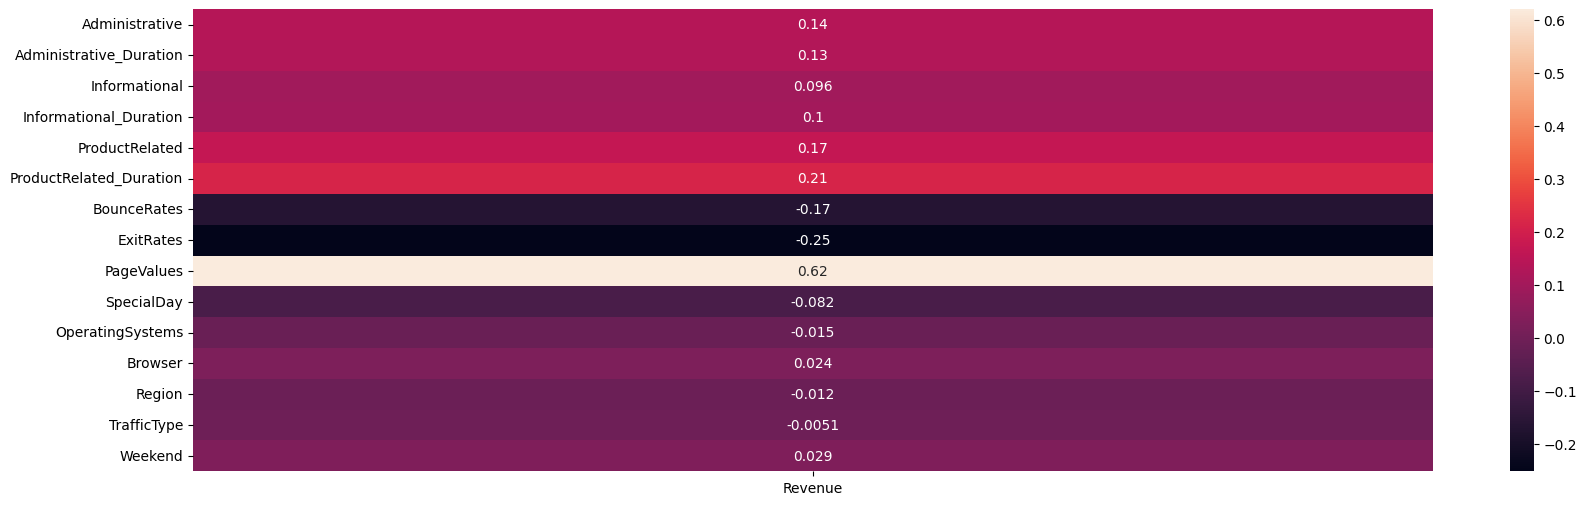

In [ ]:
# Visualize correlations with DF corr
x_columns = ['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType',
       'Weekend']
y_column = ['Revenue']

correlation_matrix = df.corr(numeric_only=True)
correlation_matrix = correlation_matrix.loc[x_columns, y_column]
plt.figure(figsize=(20, 6))
sns.heatmap(correlation_matrix, annot=True)

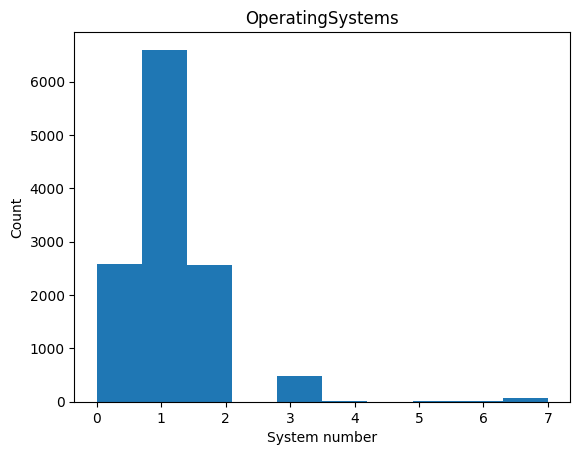

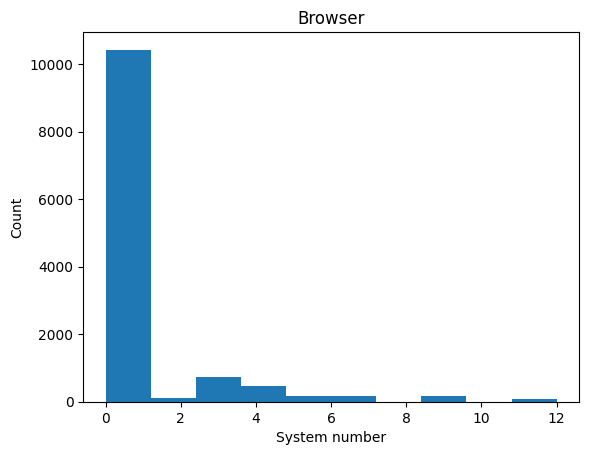

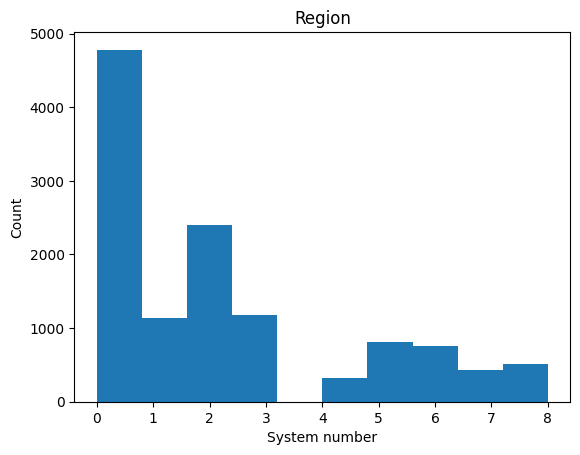

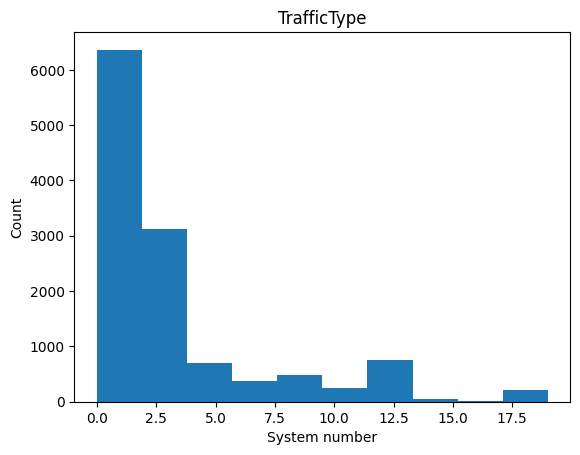

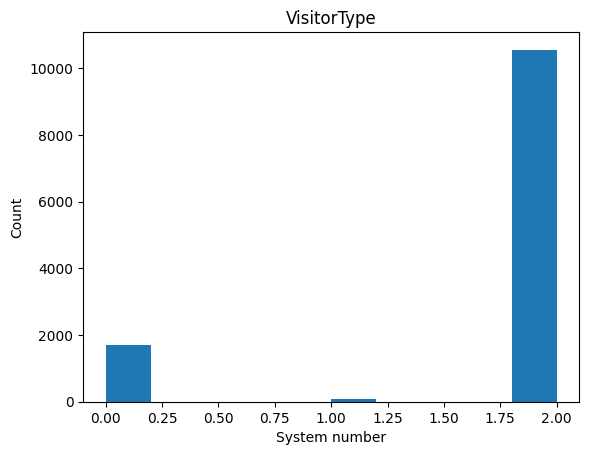

In [ ]:
# I want to know use graphs that visualize the distributions of metrics like operating systems, browser, region, and traffic type
# This can give me an idea of where most users are coming from and maybe do data analaysis on those correlations

histogram_columns = ["OperatingSystems", "Browser", "Region", "TrafficType", "VisitorType",]
for column in histogram_columns:
  plt.hist(df[column])
  plt.xlabel("System number")
  plt.ylabel("Count")
  plt.title(f"{column}")
  plt.show()

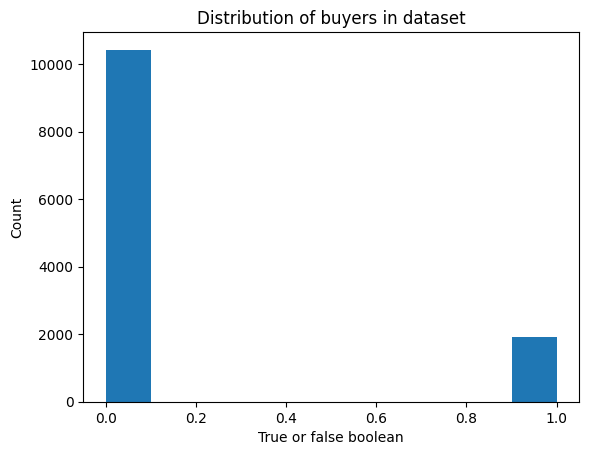

In [ ]:
# Visualize how many people bought things in the dataset
plt.hist(df["Revenue"])
plt.xlabel("True or false boolean")
plt.ylabel("Count")
plt.title("Distribution of buyers in dataset")
plt.show()

**Interpretation of graphs:** Most people operate on operating system 2, people browse mostly on browsers 1 and 2, they are mostly from region 1 with region 3 coming in second and about 1000 people from all the other regions. 6000 people have the first traffic type 3000 with the second traffic type and very few for the rest. The majority of shoppers in this dataset are returning customers. And finally, out of the 12000 points in the dataset, about 2000 actually bought something. Those 2000 are the ones I want to really want to focus on in my data analysis going forward.



Now that I have a good idea of how this dataset works and what the numbers look like, I am going to test these data points against revenue to see if my hypothesis was right or wrong. I think using a classifier might work well since we are comparing everything to a boolean, and I am also considering using clustering because that is what we are using in my DS math class and I've never applied it to an actual project.

In [ ]:
# Train, test, and score the dataset for machine learning

df = pd.read_csv('online_shoppers_intention.csv')
features = df.drop(columns = ['Revenue', 'Month', 'VisitorType', 'Weekend']) # some stuff I can't analyze because I'm getting an error on it
labels = df['Revenue']

features_train, features_test, labels_train, labels_test = \
  train_test_split(features, labels, test_size=0.1,random_state=110)
RevenueForest = RandomForestClassifier(n_estimators=200,random_state=110)

# train and test my data
RevenueForest.fit(features_train, labels_train)
RevenueForest.score(features_test, labels_test)

# 88% accuracy is considered pretty good!

0.8896999188969992

**Documentation and thought process:** I kept getting errors saying that month and visitor type and weekend are not going to work, so I decided to drop them since my hypothesis is more so focused on the other variables like bounce rate. I used mostly my notes from DS110 to create the random forest classifier, with all my numerical columns as features and comparing it against my label revenue. I can use this classifier to get feature importances, which will determine what truly matters in online shopping.

In [ ]:
# Use feature importances from scikit learn to determine which categories determine revenue
# If I do feature importances alone I cant tell which is which is which so I need to find a way
feature_dict = {}

for feature, score in zip(features, RevenueForest.feature_importances_):
  feature_dict[feature] = score
  print(f"{feature}: {score}")

Administrative: 0.04531023086257189
Administrative_Duration: 0.06482559626324881
Informational: 0.018931817737165398
Informational_Duration: 0.02929587997811325
ProductRelated: 0.08016949845050722
ProductRelated_Duration: 0.09788710011264143
BounceRates: 0.06302283176772186
ExitRates: 0.09988336763989775
PageValues: 0.3860425224029226
SpecialDay: 0.00556924670395092
OperatingSystems: 0.01909141825435062
Browser: 0.020860290137279552
Region: 0.03313602572732109
TrafficType: 0.03597417396230774


**Documentation and intial report 3/26:** So when I did a basic classification on my data it didn't tell me much about the data. Page values had the highest correlation, and that's not going to tell me much because the page value determines how much impact it had on the transaction process and obviously if a consumer buys something it is going to have a higher page value. I want to try some preprocessing techniques before I do machine learning. Matthew Morris from DS219 suggested I normalize the data (prevents bias towards values like pagevalue) and also use LabelEncoder from preprocessing so that I can handle the other values that I didn't get to in my initial machine learning like visitor type.

In [ ]:
#Preprocess for machine learning

df = pd.read_csv('online_shoppers_intention.csv')
le = LabelEncoder()
for column in df.columns:
  df[column] = le.fit_transform(df[column])

df_scaler = MinMaxScaler()
normalized_df = df_scaler.fit_transform(df)

In [ ]:
# conduct machine learning

features = df.drop(columns = ['Revenue']) # everything but revenue is going to be a feature here
labels = df['Revenue']

features_train, features_test, labels_train, labels_test = \
  train_test_split(features, labels, test_size=0.2,random_state=110)
RevenueForest2 = RandomForestClassifier(n_estimators=200,random_state=110)

# train and test my data
RevenueForest2.fit(features_train, labels_train)
RevenueForest2.score(features_test, labels_test)

# 89% accuracy is also pretty good!

0.8941605839416058

In [ ]:
# Feature importances v2

feature_dict = {}

for feature, score in zip(features, RevenueForest2.feature_importances_):
  feature_dict[feature] = score
  print(f"{feature}: {score}")

sorted_feature_dict = feature_dict

Administrative: 0.041126307283865945
Administrative_Duration: 0.05650360399471185
Informational: 0.017046826934571276
Informational_Duration: 0.026714835827327896
ProductRelated: 0.07311785634298747
ProductRelated_Duration: 0.08927780942259472
BounceRates: 0.05668971765094791
ExitRates: 0.08943347709529043
PageValues: 0.3851934831102084
SpecialDay: 0.003549343487890638
Month: 0.04277859122224172
OperatingSystems: 0.01768425331161307
Browser: 0.018588066386686135
Region: 0.02966449153954845
TrafficType: 0.030326920695711773
VisitorType: 0.011720652834590476
Weekend: 0.010583762859211818


**3/29 Documentation and report**: I got pretty much the exact same results except a little bit of the percentage had to be allocated to the new variables. It overall didn't tell me much, so I want to try something else. In the back of my mind I was thinking of doing Kmeans clustering but I didn't really know how to implement it because I never did it before but there is no better time to try than now!

My main goal with doing a kmeans is to sort all the data points into those with a purchase and those without. That way, I can analyze the features regarding those with a purchase and then figure out the key factors.

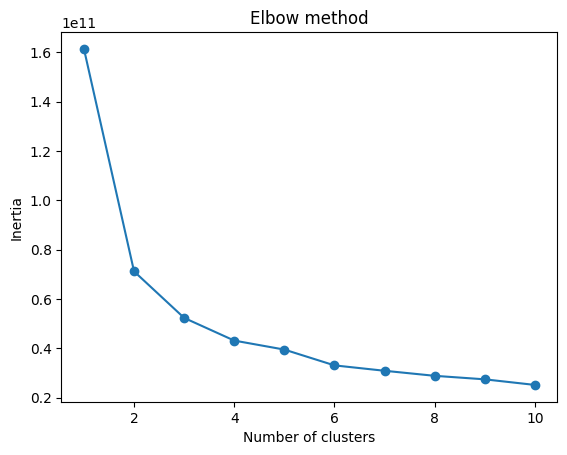

In [ ]:
# Do the elbow method to find the optimal number of clusters
# https://www.w3schools.com/python/python_ml_k-means.asp

inertias = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

**Elbow method results:** Since there is a sharp drop off at 2 and 3 I will test my kmeans with both 2 and 3 since there is no distinguish "elbow" at this point but 2 and 3 seem to make up most of my data.

In [ ]:
# Standard scale to prepare for kmeans
features = df.drop(columns = ['Revenue']) # I want clustering to evaluate revenue which is why I am not putting it in Kmeans
scaler = StandardScaler()
standard_features = scaler.fit_transform(features)

#Kmeans Clustering
kmeans = KMeans(n_clusters = 3, random_state = 110, n_init = 100, init ='k-means++') # I want two clusters since revenue is a boolean
df['Cluster'] = kmeans.fit_predict(standard_features)

cluster_analysis = df.groupby('Cluster')['Revenue'].mean() # I needed a way to visualize my clusters so this is from chat
print(cluster_analysis)

Cluster
0    0.257038
1    0.284182
2    0.100733
Name: Revenue, dtype: float64


In [ ]:
# Evaluate clusterings using a silhouette score
sil_score = silhouette_score(standard_features, df['Cluster'])
print(f"Silhouette Score: {sil_score}")

**Kmeans results:** 0.3 and 0.1 are not great numbers for k = 2, meaning that I am failing to capture 60% of it. I also tested k = 3 and I got 0.25, 0.28 and 0.1, so I am still failing to capture a bunch of the data in my clusters. This means that kmeans overall is probably not the way to go to evaluate this dataset since even with the elbow method finding the most optimal Ks I am not getting the best results.  I will stick to my observations about df corr and my random forest then.

**Overall report:** So overall, I found most of my hypothesis to be incorrect. When I crunched the numbers for importance and df corr compared against revenue, I found that page value seemed to stand out more than the rest of the features. Obviously, some of the other features still mattered like product related duration, but page value was up to 4x more important based off of my analysis. I think the reason for this is because the page itself determines what someone is going to buy, not the month or where a person is located or any of those extraneous factors. So in conclusion, the most important factor is the page value, with everything else still mattering but to a far lesser degree.

**Citation**
Sakar, C. & Kastro, Y. (2018). Online Shoppers Purchasing Intention Dataset [Dataset]. UCI Machine Learning Repository. https://doi.org/10.24432/C5F88Q.